# Wyscout: Analysis of Denmark - Slovenia in Qualifier"

In [178]:
import pandas as pd
import numpy as np
import json
from IPython.display import display
import zipfile
from pathlib import Path
import os
from mplsoccer import Pitch, Sbopen, VerticalPitch
import matplotlib.pyplot as plt

In [346]:
def normalize_value(key, value, compare_value, perc_categories = None):
    """ Normalize or pass the value through based on category """
    if key not in perc_categories:
        return value / max(value, compare_value)
    return value

def add_value_labels(ax, values, labels, y_pos, is_left=True):
    """ Add value labels to the bars """
    for i, (value, label) in enumerate(zip(values, labels)):
        if is_left: 
            ax.text(value - 0.05, y_pos[i], str(label), va='center', ha='right', color='black', fontsize=10)
        else:  
            ax.text(value + 0.05, y_pos[i], str(label), va='center', ha='left', color='black', fontsize=10)

def plot_stats_barchart(team1_stats, team2_stats, team1_name = None, team2_name = None, perc_categories = None, title = "", subtitle = "",
                        team1_color = 'red', team2_color = 'blue'):
    """ Display a bar chart comparing the match statistics between two teams"""

    # Normalizing values within each category between the teams, except for percentage categories
    normalized_dnk_data = {key: normalize_value(key, value, team2_stats[key], perc_categories) for key, value in team1_stats.items()}
    normalized_svn_data = {key: normalize_value(key, value, team1_stats[key], perc_categories) for key, value in team2_stats.items()}
    team_1_values = list(normalized_dnk_data.values())[::-1]
    team_2_values = list(normalized_svn_data.values())[::-1]

    # Original values for displaying at the end of bars
    original_team_1_values = list(team1_stats.values())[::-1]
    original_team_2_values = list(team2_stats.values())[::-1]

    # Categories for the y-axis
    categories = list(team1_stats.keys())[::-1]

    # The y position for the bars
    y_pos = np.arange(len(categories))

    # Create the figure and the axes
    fig, ax = plt.subplots(figsize=(10, len(categories) * 0.5))
    fig.patch.set_facecolor('white')

    # Draw bars for team 1 and team 2
    ax.barh(y_pos, team_1_values, color=team1_color, alpha=0.6)
    ax.barh(y_pos, [-value for value in team_2_values], color=team2_color, alpha=0.6)

    # Add data labels inside the bars (categories)
    for y, category in zip(y_pos, categories):
        ax.text(0, y, category, va='center', ha='center', color='black', fontsize=10)

    # Add value labels to the bars (team values)
    add_value_labels(ax, team_1_values, original_team_1_values, y_pos, is_left=False)
    add_value_labels(ax, [-v for v in team_2_values], original_team_2_values, y_pos, is_left=True)

    ax.text(1, 1.1, team1_name, transform=ax.transAxes, ha='right', va='bottom', color=team1_color, fontsize=16, fontweight='bold')
    ax.text(0, 1.1, team2_name, transform=ax.transAxes, ha='left', va='bottom', color=team2_color, fontsize=16, fontweight='bold')

    # Set the labels and title (if needed)
    ax.set_title(f"{title}", fontsize=18, fontweight='bold', pad=40)
    ax.text(0.5, 1.02, f"{subtitle}", fontsize=16, fontweight='bold', ha='center', va='bottom', transform=ax.transAxes)

    # Remove the spines and ticks, and add gridlines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_visible(False)  
    ax.xaxis.set_visible(False)
    plt.axvline(0, color='grey', linewidth=0.8) 
    ax.xaxis.grid(False)
    ax.legend().set_visible(False)

    plt.tight_layout()
    plt.show()


## Load data

In [44]:
match_id = "5414302"
df_events = pd.read_csv(f"./results/wyscout/{match_id}_df_events.csv", index_col=0)

In [45]:
print(df_events.columns, "\n")

Index(['id', 'matchId', 'matchPeriod', 'minute', 'second', 'matchTimestamp',
       'videoTimestamp', 'relatedEventId', 'shot', 'groundDuel', 'aerialDuel',
       'infraction', 'carry', 'type.primary', 'type.secondary', 'location.x',
       'location.y', 'team.id', 'team.name', 'team.formation',
       'opponentTeam.id', 'opponentTeam.name', 'opponentTeam.formation',
       'player.id', 'player.name', 'player.position', 'pass.accurate',
       'pass.angle', 'pass.height', 'pass.length', 'pass.recipient.id',
       'pass.recipient.name', 'pass.recipient.position', 'pass.endLocation.x',
       'pass.endLocation.y', 'possession.id', 'possession.duration',
       'possession.types', 'possession.eventsNumber', 'possession.eventIndex',
       'possession.startLocation.x', 'possession.startLocation.y',
       'possession.endLocation.x', 'possession.endLocation.y',
       'possession.team.id', 'possession.team.name',
       'possession.team.formation', 'possession.attack.withShot',
       'pos

## 1.0 Denmark vs Slovenia 2:1 (2023-11-20)

### 1.1 Game Statistics

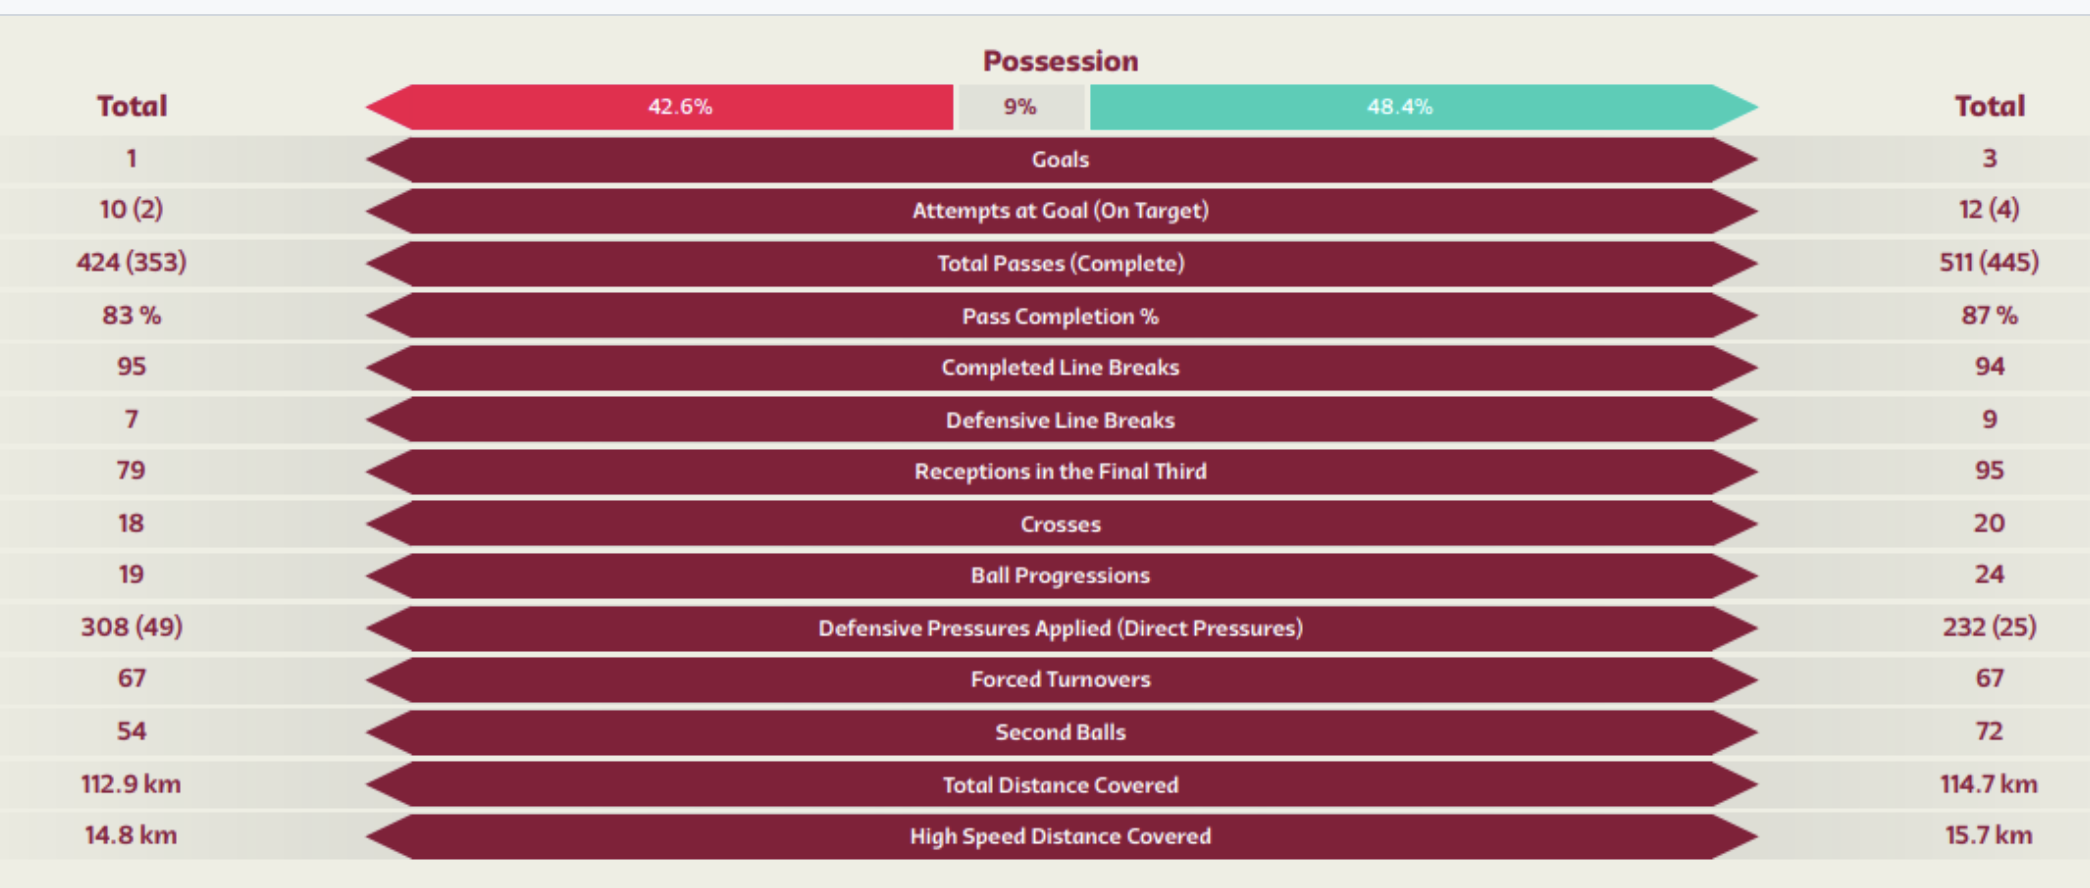

In [277]:
df_events["pass.accurate"]

0        True
1       False
2       False
3        True
4         NaN
        ...  
1714      NaN
1715      NaN
1716     True
1717    False
1718      NaN
Name: pass.accurate, Length: 1719, dtype: object

In [260]:
df_events.columns

Index(['id', 'matchId', 'matchPeriod', 'minute', 'second', 'matchTimestamp',
       'videoTimestamp', 'relatedEventId', 'shot', 'groundDuel', 'aerialDuel',
       'infraction', 'carry', 'type.primary', 'type.secondary', 'location.x',
       'location.y', 'team.id', 'team.name', 'team.formation',
       'opponentTeam.id', 'opponentTeam.name', 'opponentTeam.formation',
       'player.id', 'player.name', 'player.position', 'pass.accurate',
       'pass.angle', 'pass.height', 'pass.length', 'pass.recipient.id',
       'pass.recipient.name', 'pass.recipient.position', 'pass.endLocation.x',
       'pass.endLocation.y', 'possession.id', 'possession.duration',
       'possession.types', 'possession.eventsNumber', 'possession.eventIndex',
       'possession.startLocation.x', 'possession.startLocation.y',
       'possession.endLocation.x', 'possession.endLocation.y',
       'possession.team.id', 'possession.team.name',
       'possession.team.formation', 'possession.attack.withShot',
       'pos

In [257]:
shots_dnk = df_events[(~df_events["shot.isGoal"].isnull()) & (df_events["team.name"] == "Denmark")]
shots.svn = df_events[(~df_events["shot.isGoal"].isnull()) & (df_events["team.name"] == "Slonvenia")]

shots_dnk







In [263]:
df_events["type.primary"].value_counts()

type.primary
pass                 964
duel                 386
interception          72
touch                 67
game_interruption     67
throw_in              45
free_kick             30
infraction            26
shot                  13
clearance             12
goal_kick             10
corner                10
shot_against           9
offside                5
goalkeeper_exit        2
acceleration           1
Name: count, dtype: int64

In [281]:
df_events.groupby(['team.name'])['pass.accurate'].sum() / df_events.groupby(['team.name'])['pass.accurate'].count()

team.name
Denmark     0.874302
Slovenia    0.758621
Name: pass.accurate, dtype: object

In [285]:
df_events[~df_events["pass.accurate"].isnull()][["pass.accurate", "type.primary"]]

,pass.accurate,type.primary
0,True,pass
1,False,pass
2,False,interception
3,True,pass
6,False,pass
...,...,...
1704,True,pass
1709,False,corner
1713,True,goal_kick
1716,True,pass


In [286]:
passes_completed = df_events[df_events["type.primary"] == "pass"].groupby(['team.name'])['pass.accurate'].sum()
(passes_completed.loc['Denmark'] / team_type_counts.loc['Denmark', 'pass']).round(2)

0.87

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


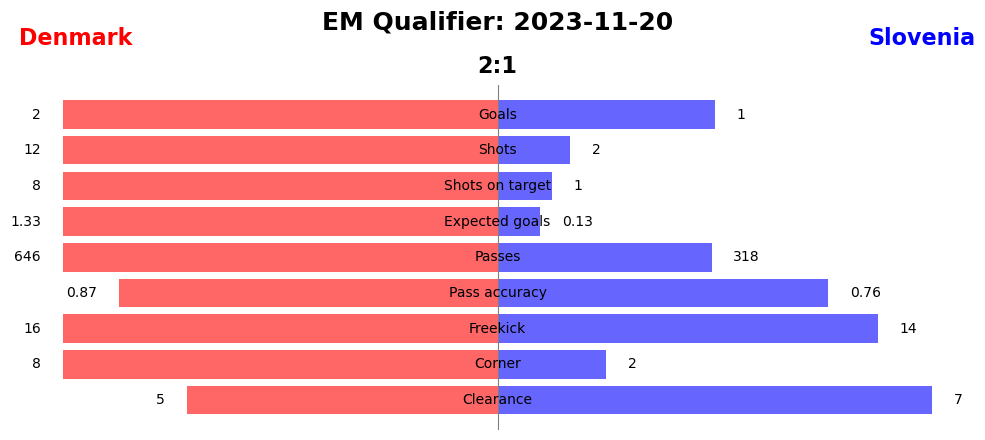

In [347]:
# Display game statistics, such as the number of shots, passes, etc. per team

# things to add: Passes completed, flanke, flanken completed, possession, interception, possession duration,
# duels, duels won, ground duels, ground duels won, aerial duels, aerial duels won, 
# infraction, yellw card, red card, 


team_type_counts = df_events.groupby(['team.name', 'type.primary']).size().unstack(fill_value=0)
shots_dnk = df_events[(~df_events["shot.isGoal"].isnull()) & (df_events["team.name"] == "Denmark")]
shots_svn = df_events[(~df_events["shot.isGoal"].isnull()) & (df_events["team.name"] == "Slovenia")]
passes_completed = df_events[df_events["type.primary"] == "pass"].groupby(['team.name'])['pass.accurate'].sum()

dnk_data = {'Goals': shots_dnk['shot.isGoal'].sum(),
            'Shots': shots_dnk.shape[0],
            'Shots on target': shots_dnk['shot.onTarget'].sum(),
            'Expected goals': shots_dnk['shot.xg'].sum().round(2),
            'Passes': team_type_counts.loc['Denmark', 'pass'],
            'Pass accuracy': (passes_completed.loc['Denmark'] / team_type_counts.loc['Denmark', 'pass']).round(2),
            'Freekick': team_type_counts.loc['Denmark', 'free_kick'],
            'Corner': team_type_counts.loc['Denmark', 'corner'],
            'Clearance': team_type_counts.loc['Denmark', 'clearance'],
            }

svn_data = {'Goals': shots_svn['shot.isGoal'].sum(),
            'Shots': shots_svn.shape[0],
            'Shots on target': shots_svn['shot.onTarget'].sum(),
            'Expected goals': shots_svn['shot.xg'].sum().round(2),
            'Passes': team_type_counts.loc['Slovenia', 'pass'],
            'Pass accuracy': (passes_completed.loc['Slovenia'] / team_type_counts.loc['Slovenia', 'pass']).round(2),
            'Freekick': team_type_counts.loc['Slovenia', 'free_kick'],
            'Corner': team_type_counts.loc['Slovenia', 'corner'],
            'Clearance': team_type_counts.loc['Slovenia', 'clearance'],
            }

# if category % do not normalize
perc_categories = ['Pass accuracy']

plot_stats_barchart(svn_data, dnk_data, team1_name='Slovenia', team2_name='Denmark', perc_categories=perc_categories, title='EM Qualifier: 2023-11-20', 
                    subtitle='2:1', team1_color='blue', team2_color='red')




### shots, on Target, Expected Goals

In [97]:
# Getting the shots
print(df_events[~df_events["shot.isGoal"].isna()][["shot.isGoal", "shot.xg", "shot.onTarget", "team.name", "type.primary"]], "\n")
shots_per_team = df_events[~df_events["shot.isGoal"].isna()]["team.name"].value_counts()
print("shots per team:\n", shots_per_team, "\n")

     shot.isGoal   shot.xg shot.onTarget team.name type.primary
75         False  0.003223         False   Denmark         shot
150        False  0.033680          True   Denmark         shot
216        False  0.057060          True   Denmark         shot
229        False  0.007192         False   Denmark         shot
270        False  0.126400          True   Denmark         shot
549         True  0.431300          True   Denmark         shot
583         True  0.124800          True  Slovenia    free_kick
943        False  0.083790         False   Denmark         shot
971        False  0.060680         False   Denmark         shot
1007       False  0.163000          True   Denmark         shot
1025        True  0.233500          True   Denmark         shot
1063       False  0.096530          True   Denmark         shot
1433       False  0.030930          True   Denmark         shot
1711       False  0.009231         False  Slovenia         shot 

shots per team:
 team.name
Denmark    

In [106]:
# Goals 
goals = df_events[df_events["shot.isGoal"] == True][["team.name", "type.primary"]]
goals

,team.name,type.primary
549,Denmark,shot
583,Slovenia,free_kick
1025,Denmark,shot


In [93]:
# shots on target
on_target = df_events[~df_events["shot.isGoal"].isna()].groupby("team.name")["shot.onTarget"].sum() / df_events[~df_events["shot.isGoal"].isna()].groupby("team.name")["shot.onTarget"].count()
print(on_target.apply(lambda x: round(x, 2)))

team.name
Denmark     0.67
Slovenia    0.50
Name: shot.onTarget, dtype: float64


In [94]:
# Expected Goals
df_events[~df_events["shot.isGoal"].isna()].groupby("team.name")["shot.xg"].sum()

team.name
Denmark     1.327285
Slovenia    0.134031
Name: shot.xg, dtype: float64

In [177]:
shots = df_events[~df_events["shot.isGoal"].isna()]
team_names = shots["team.name"].unique()
team1, team2 = team_names[0], team_names[1]
shots["location.x"]

75      91.0
150     77.0
216     87.0
229     86.0
270     85.0
549     94.0
583     82.0
943     88.0
971     93.0
1007    93.0
1025    92.0
1063    88.0
1433    79.0
1711    78.0
Name: location.x, dtype: float64

In [176]:
team_names 

array(['Denmark', 'Slovenia'], dtype=object)

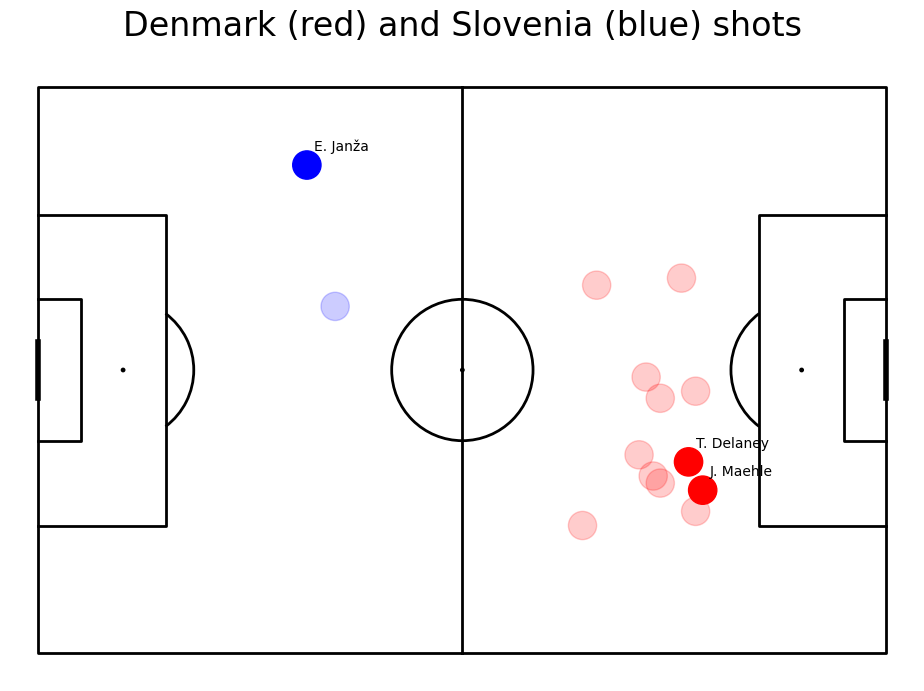

In [184]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

for i,shot in shots.iterrows():
    #get the information
    x=shot['location.x']
    y=shot['location.y']
    goal=shot['shot.isGoal']
    team_name=shot['team.name']
    #set circlesize
    circleSize=2
    #plot England
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player.name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot Sweden
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player.name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("Denmark (red) and Slovenia (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

### Possession

In [196]:
df_events[["possession.duration", "team.name", "possession.team.name", "type.primary", "minute", "second"]].head(40)

,possession.duration,team.name,possession.team.name,type.primary,minute,second
0,37.398685,Slovenia,Slovenia,pass,0,3
1,37.398685,Slovenia,Slovenia,pass,0,6
2,37.398685,Denmark,Slovenia,interception,0,10
3,37.398685,Slovenia,Slovenia,pass,0,13
4,37.398685,Denmark,Slovenia,duel,0,15
5,37.398685,Slovenia,Slovenia,duel,0,15
6,37.398685,Denmark,Slovenia,pass,0,17
7,37.398685,Slovenia,Slovenia,interception,0,18
8,37.398685,Slovenia,Slovenia,pass,0,20
9,37.398685,Denmark,Slovenia,duel,0,20


In [119]:
possession = df_events.groupby("team.name")["possession.duration"].sum() / df_events["possession.duration"].sum()
print(possession.apply(lambda x: round(x, 2)))

team.name
Denmark     0.7
Slovenia    0.3
Name: possession.duration, dtype: float64


In [191]:
# average possession duration per team
possession = df_events.groupby("team.name")["possession.duration"].mean()
print(possession.apply(lambda x: round(x, 2)))

# average possession duration before a shot
possession = df_events[~df_events["shot.isGoal"].isna()].groupby("team.name")["possession.duration"].mean()
print(possession.apply(lambda x: round(x, 2)))

team.name
Denmark     32.57
Slovenia    20.47
Name: possession.duration, dtype: float64
team.name
Denmark     21.88
Slovenia     1.64
Name: possession.duration, dtype: float64


In [220]:
# player with most passes per team
passes = df_events[df_events["type.primary"] == "pass"]
passes_per_player = passes.groupby(["team.name", "player.name"])["player.name"].count().sort_values(ascending=False)
print(passes_per_player)


team.name  player.name        
Denmark    A. Christensen         94
           J. Andersen            93
           J. Vestergaard         91
           P. Højbjerg            66
           V. Kristiansen         56
Slovenia   M. Blažič              45
Denmark    T. Delaney             44
Slovenia   J. Bijol               40
Denmark    C. Nørgaard            38
Slovenia   Ž. Karničnik           37
Denmark    J. Maehle              36
Slovenia   A. Čerin               35
Denmark    Y. Poulsen             33
           J. Wind                30
Slovenia   V. Drkušić             27
Denmark    K. Schmeichel          24
           M. Jensen              22
Slovenia   T. Elšnik              20
           J. Oblak               18
           J. Mlakar              15
           E. Janža               14
           B. Šeško               13
           J. Kurtič              12
Denmark    M. Hjulmand            12
Slovenia   J. Gorenc Stankovič    12
           B. Verbič              11
       

In [ ]:
# player with most passes per team in the opposition half
passes = df_events[df_events["type.name"] == "Pass"]


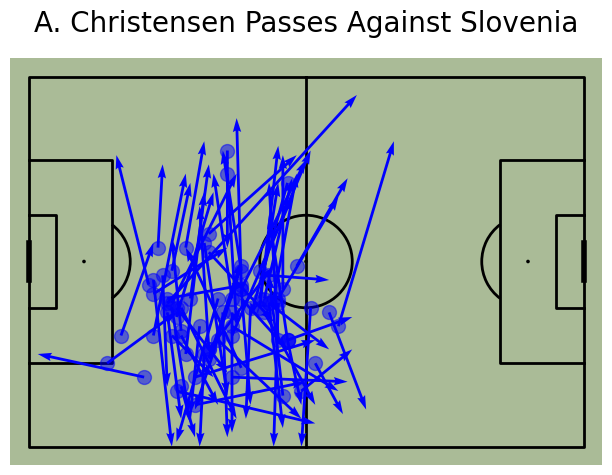

In [234]:

pitch_length = 120
pitch_width = 80
player = "A. Christensen"

# Create a mask to filter the DataFrame
christensen_mask = ((df_events["player.name"] == player) &  
                    (df_events["type.primary"] == "pass") &
                    #(df_events["matchPeriod"] == "1H") &
                    (df_events["location.x"].between(0, pitch_length)) &
                    (df_events["location.y"].between(0, pitch_width)) &
                    (df_events["pass.endLocation.x"].between(0, pitch_length)) &
                    (df_events["pass.endLocation.y"].between(0, pitch_width)))

# Filter the DataFrame based on the mask
df_christ_passes = df_events.loc[christensen_mask, ["location.x", "location.y", "pass.endLocation.x", "pass.endLocation.y"]]

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', line_color='black', pitch_color='#aabb97')
fig, ax = pitch.draw()
pitch.arrows(df_christ_passes["location.x"], df_christ_passes["location.y"],
             df_christ_passes["pass.endLocation.x"], df_christ_passes["pass.endLocation.y"], 
             color="blue", ax=ax, width=2)
pitch.scatter(df_christ_passes["location.x"], df_christ_passes["location.y"], 
              alpha=0.5, s=100, color="blue", ax=ax)
plt.suptitle(f"{player} Passes Against Slovenia", fontsize=20)
plt.show()
